# EDA on Housing.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset

df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Basic Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
# Checking for duplicates

print("\nDuplicates:")
df.duplicated().sum()


# There are no duplicates in the dataset - all items ae unique


Duplicates:


0

In [5]:
# Checking for missing values

print("\nMissing Values:")
df.isnull().sum()


# Threre is no data missing in the dataset


Missing Values:


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
# Summary of basic statistics for the numeric data in the dataset

df.describe(include='object').T

# most common type of the house is semi-furnished

,count,unique,top,freq
mainroad,545,2,yes,468
guestroom,545,2,no,448
basement,545,2,no,354
hotwaterheating,545,2,no,520
airconditioning,545,2,no,373
prefarea,545,2,no,417
furnishingstatus,545,3,semi-furnished,227


In [7]:
# Summary of basic statistics for the numeric data in the dataset

df.describe(include='number')

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
# combinng bedrooms and guestroom to get the total number of bedrooms

df['total_bhk'] = df['bedrooms'] + df['guestroom'].apply(lambda x: 1 if x == 'yes' else 0)

In [9]:
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,total_bhk
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,4
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,4
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,3


## Statistical Analysis

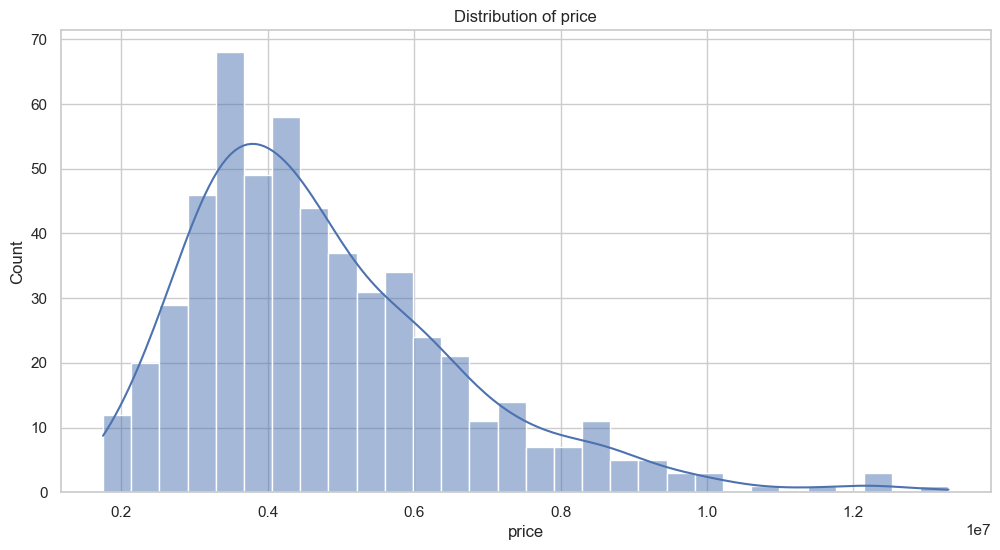

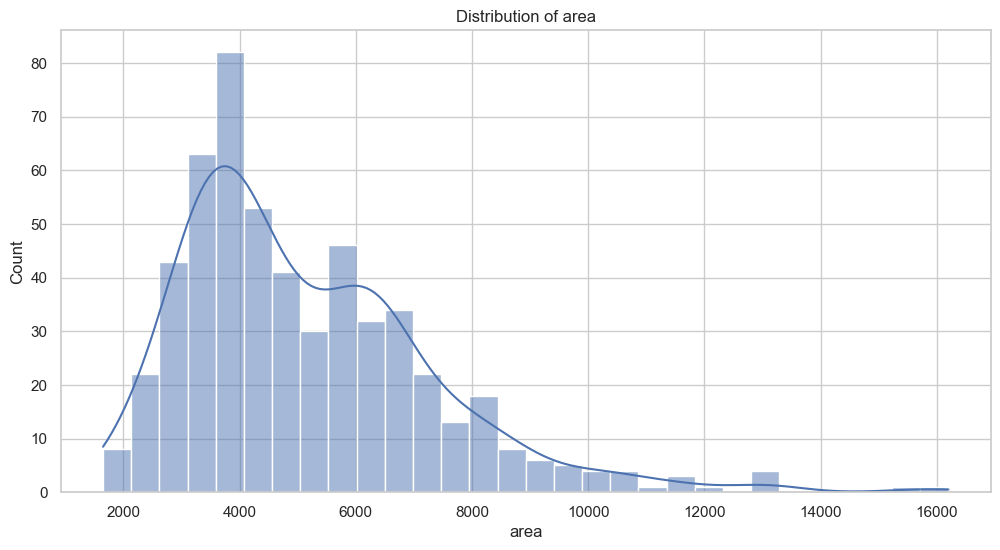

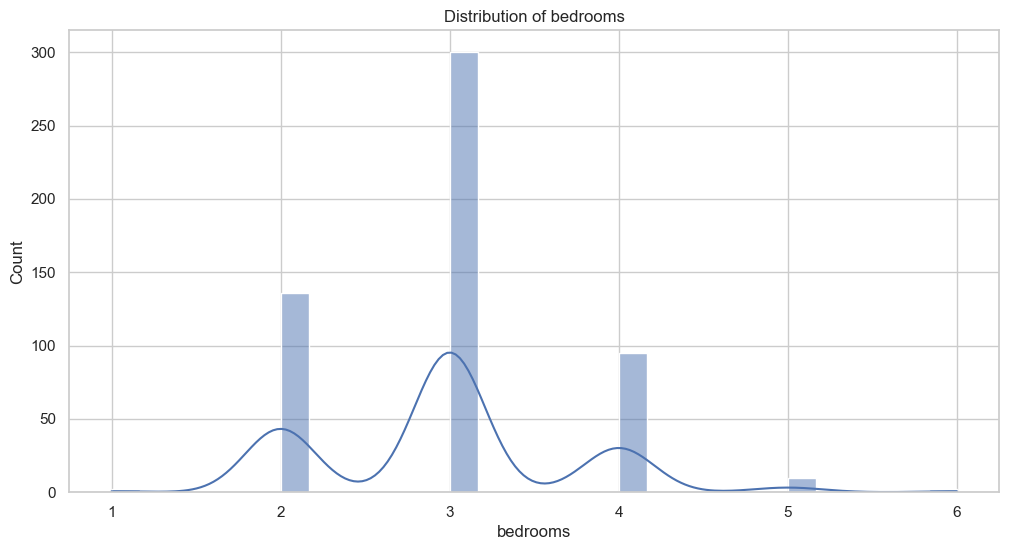

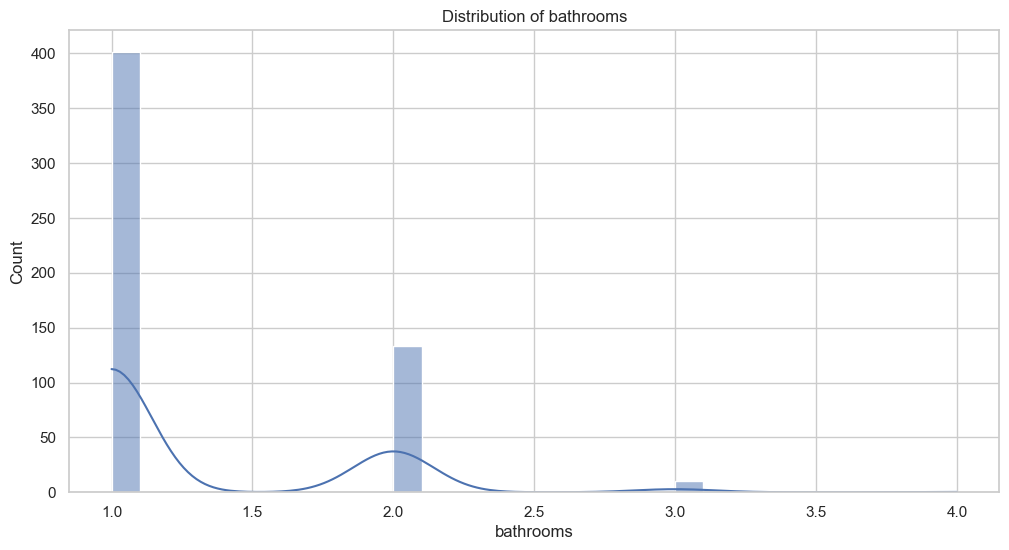

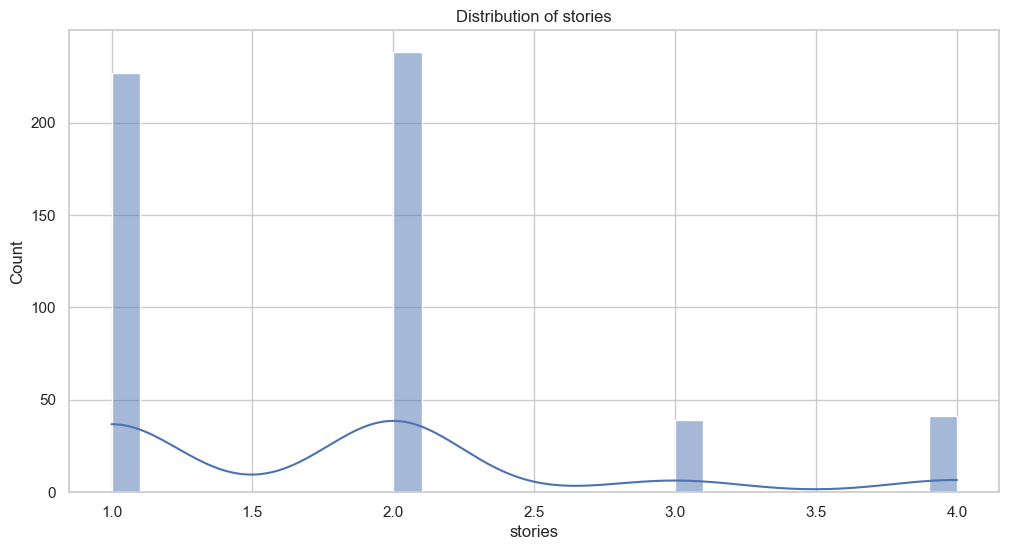

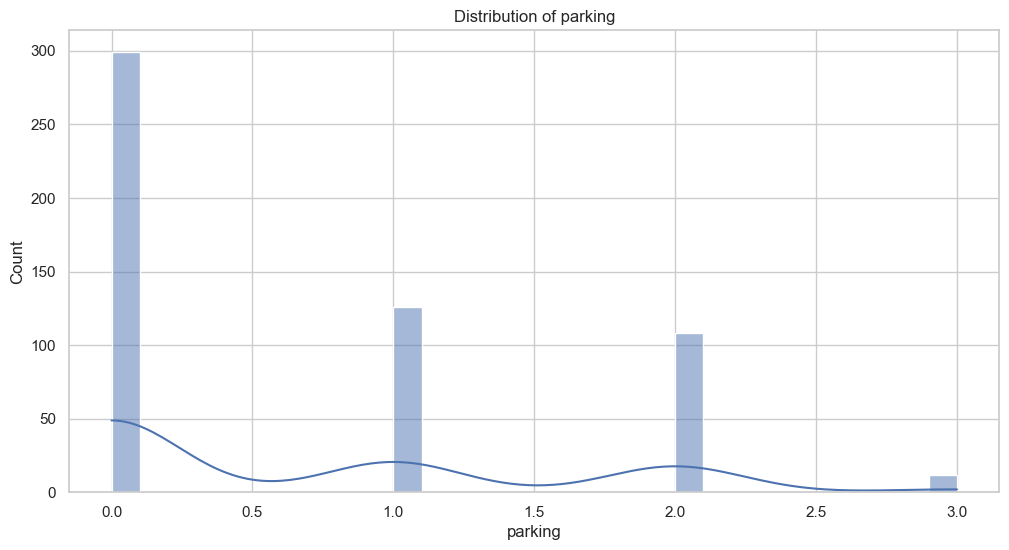

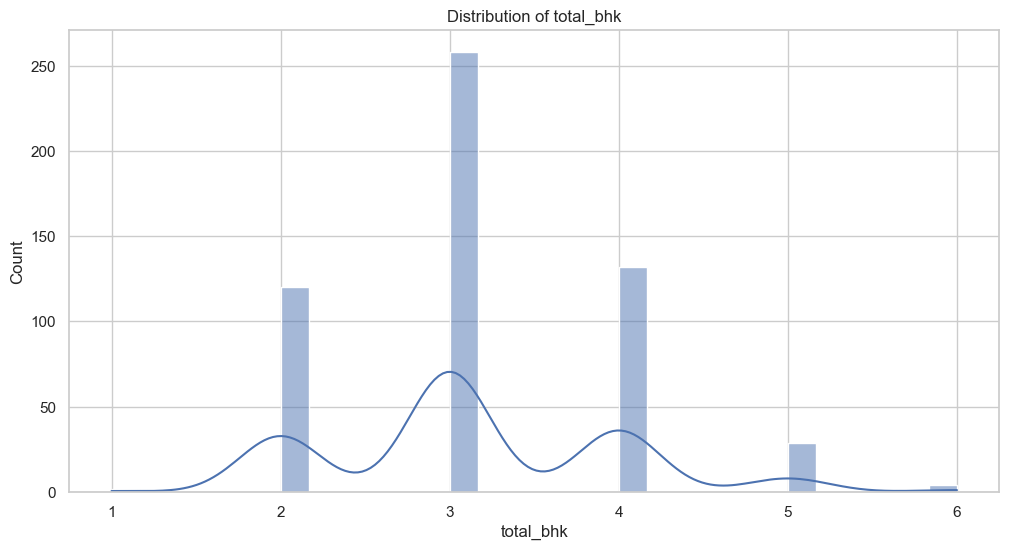

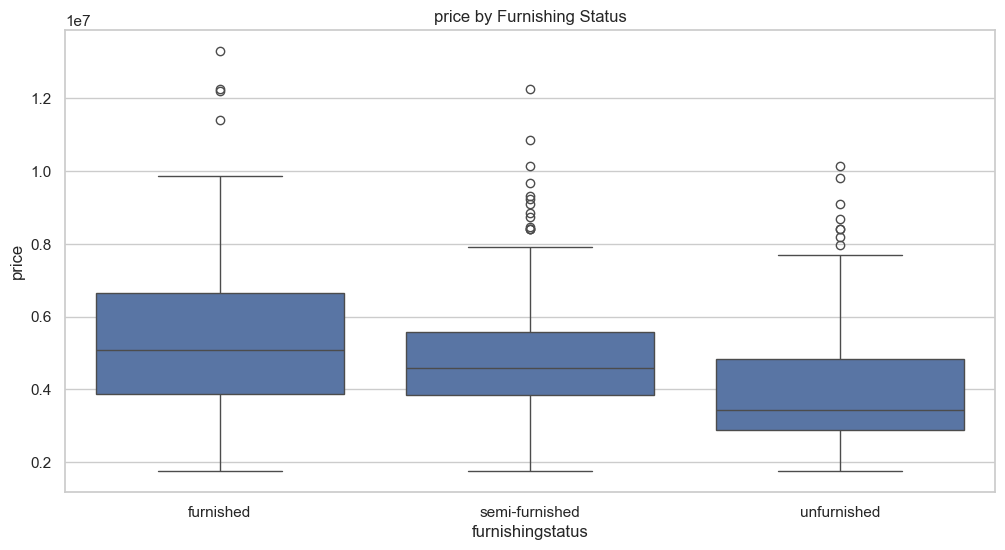

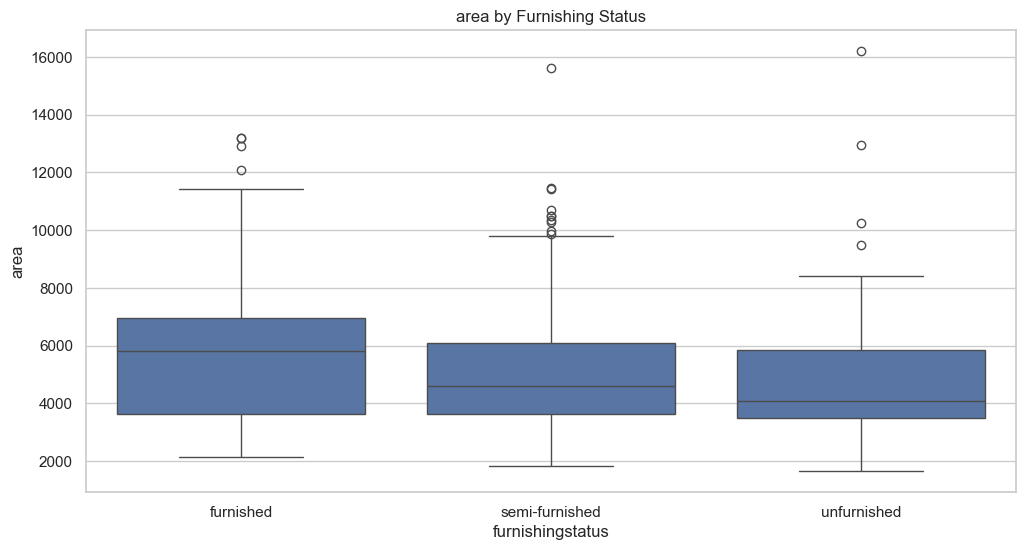

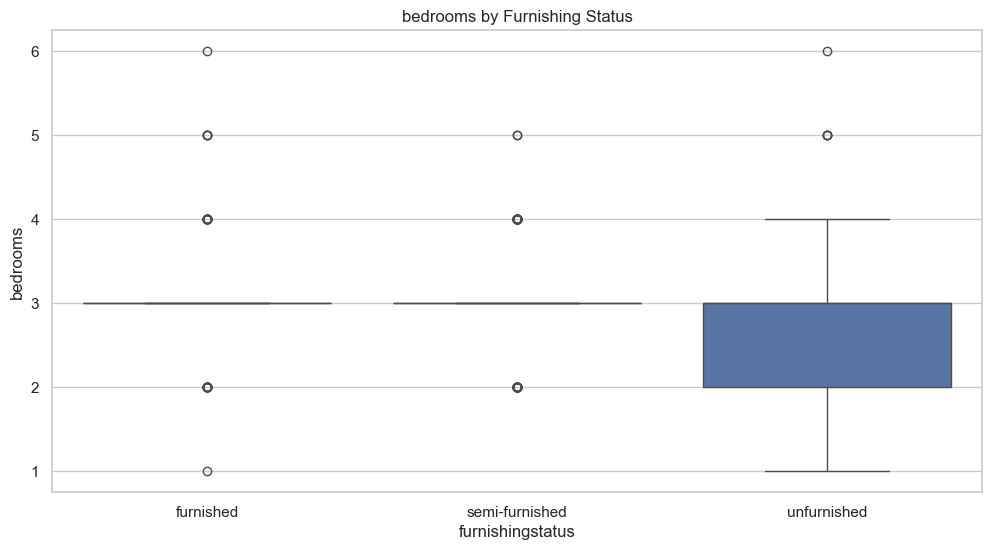

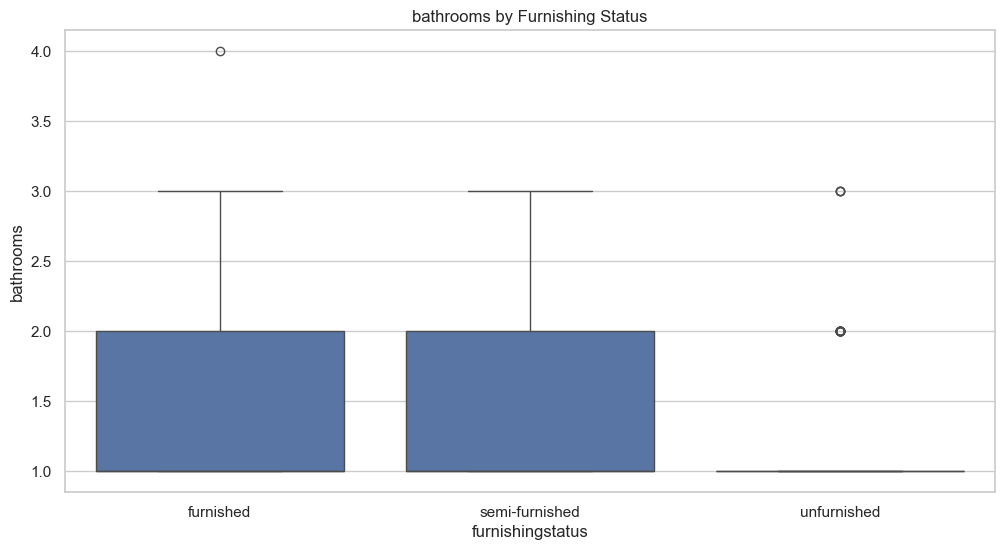

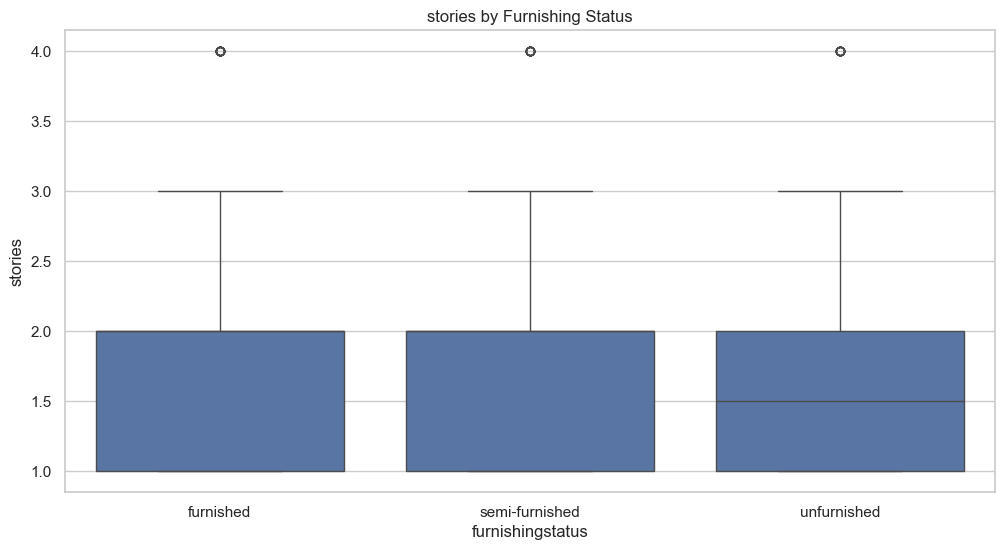

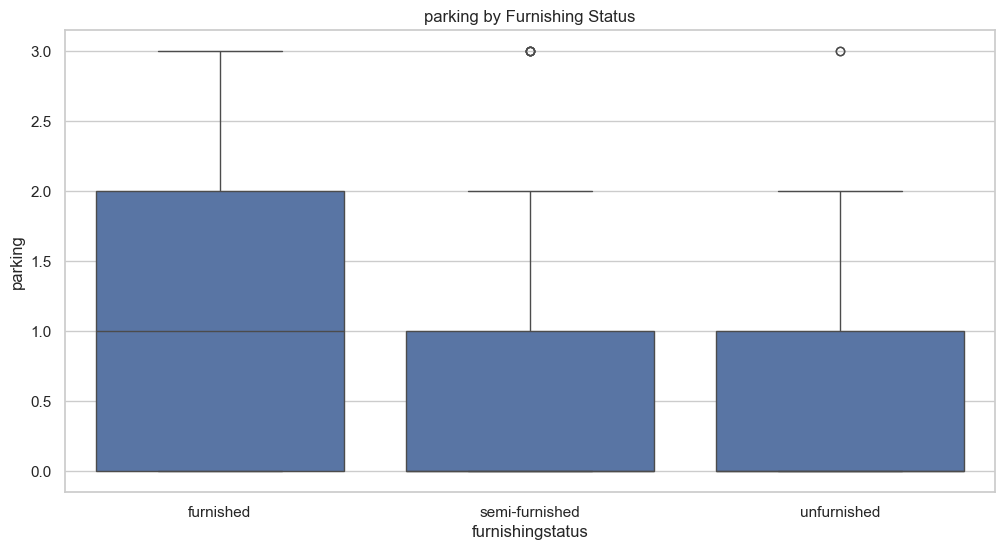

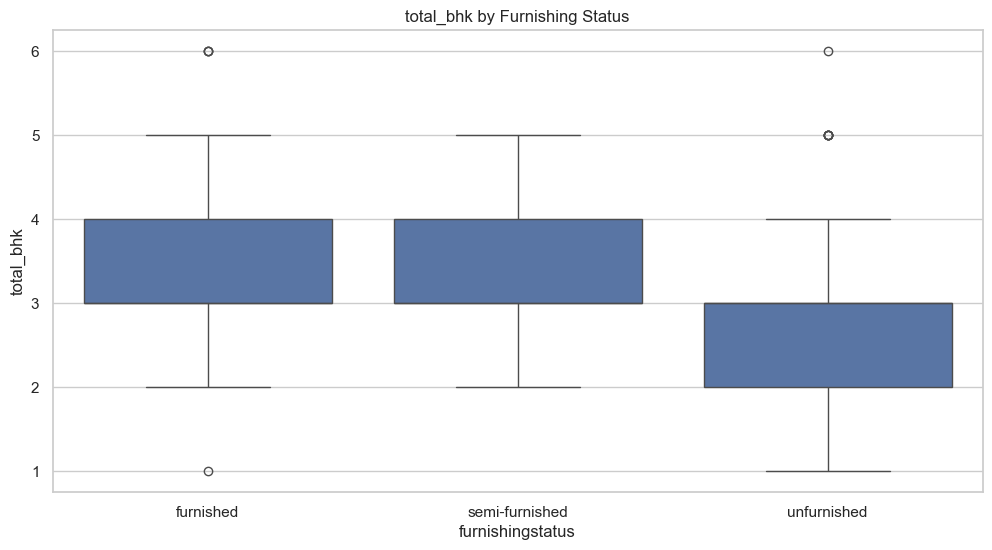

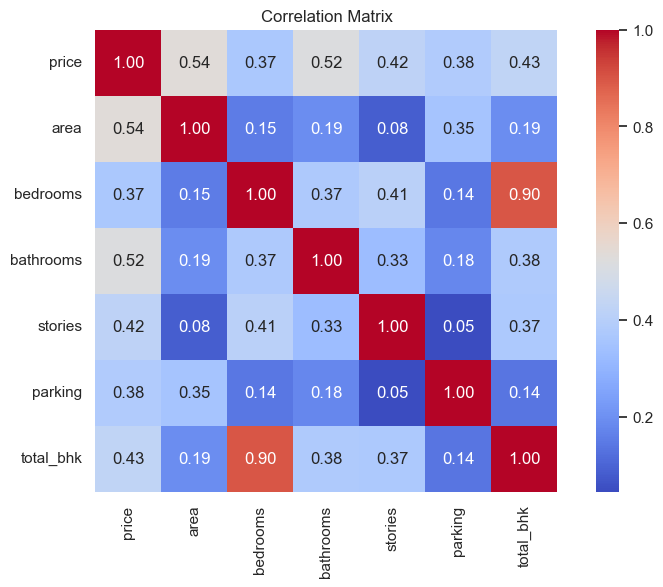

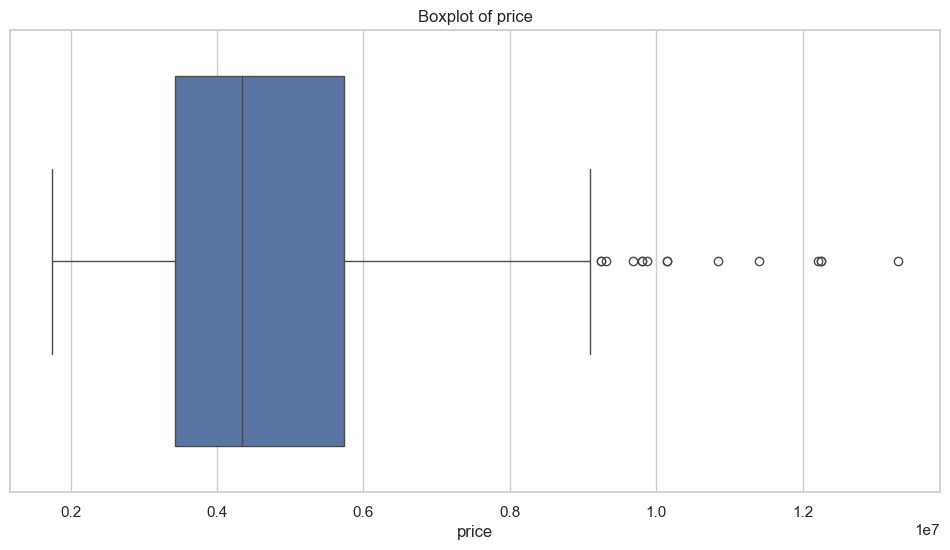

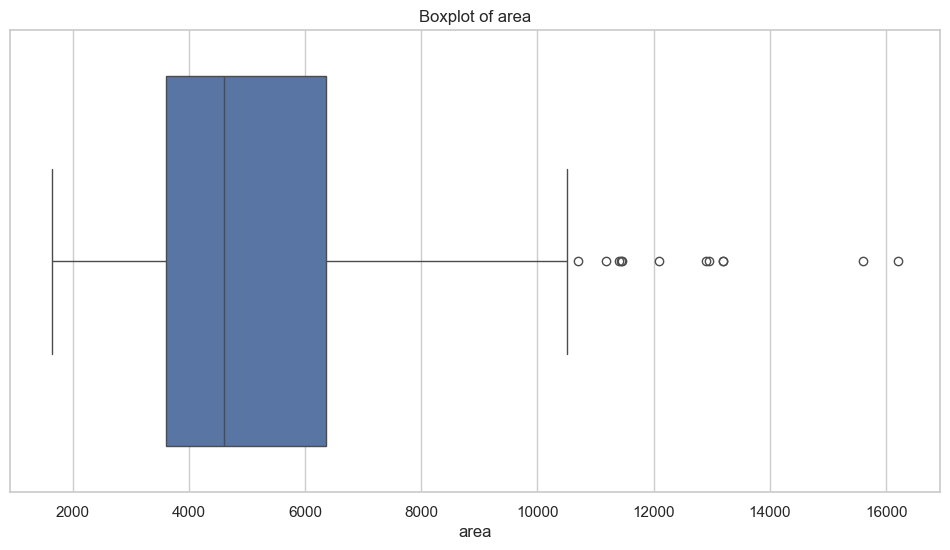

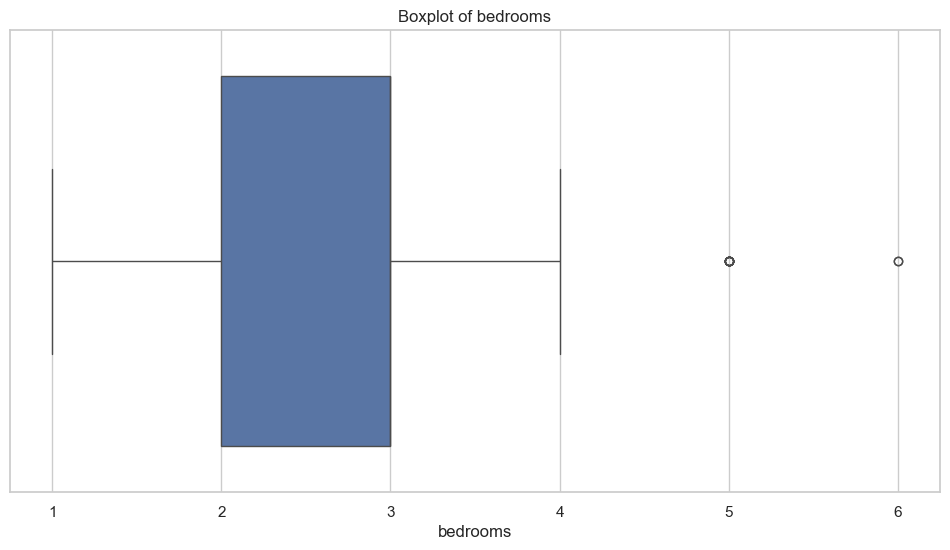

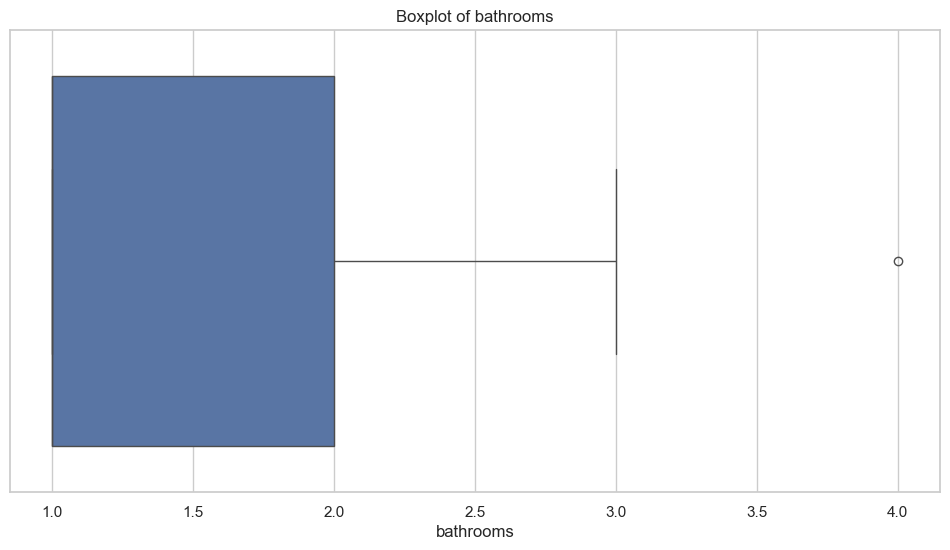

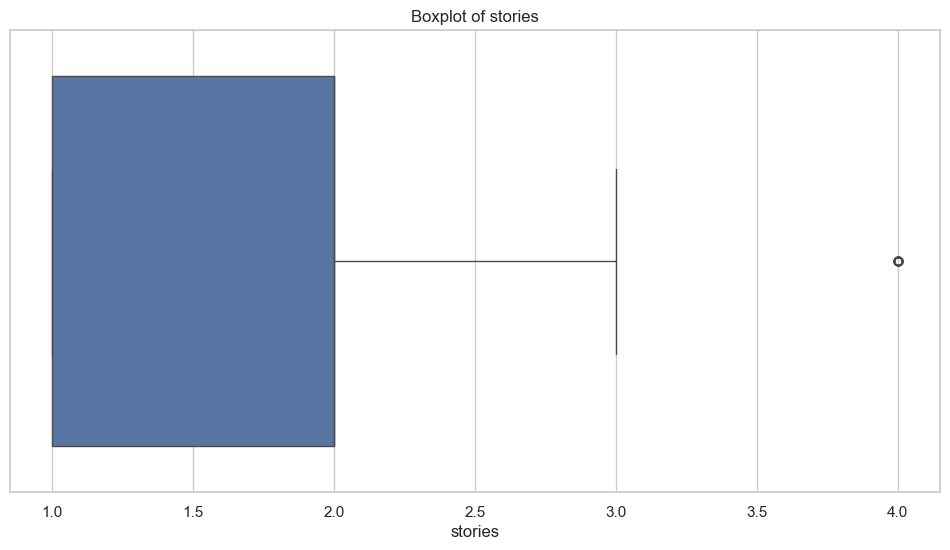

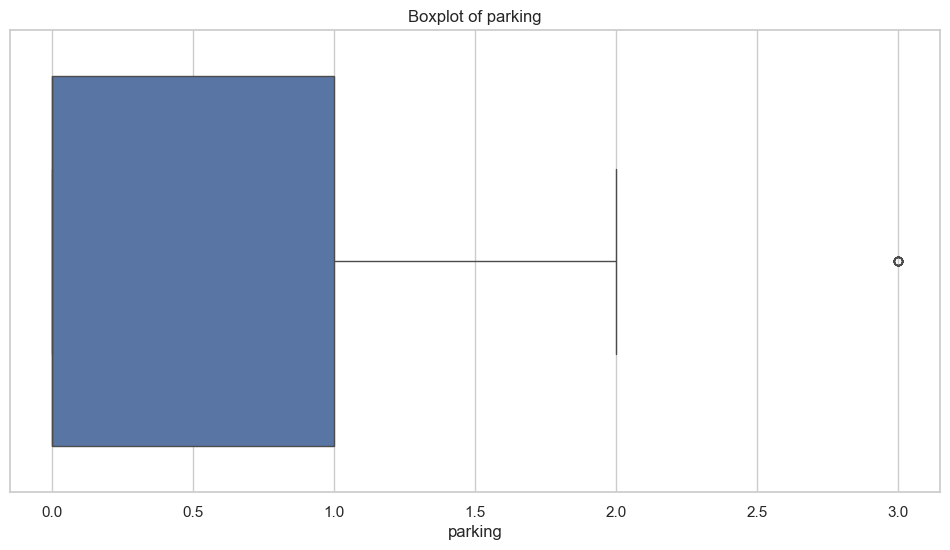

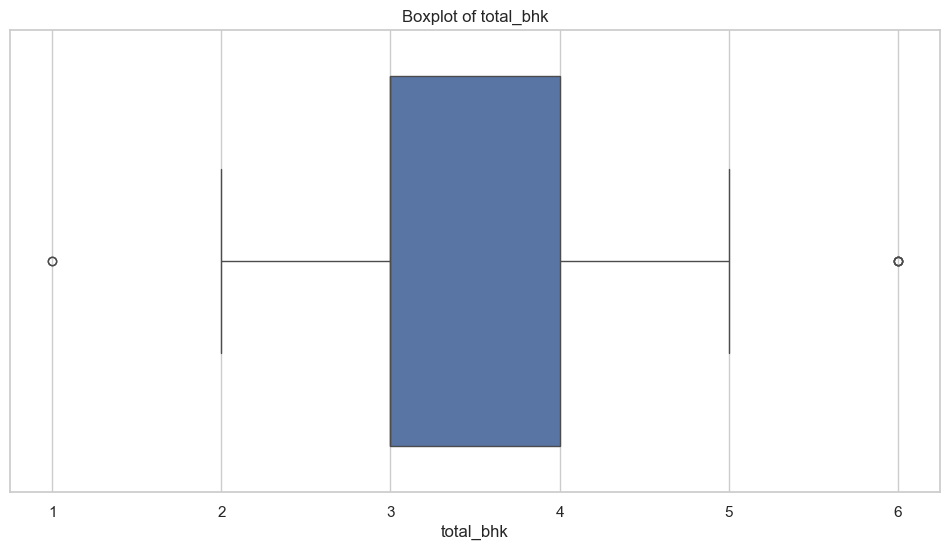

In [10]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Basic information summary
data_info = {
    "Shape": df.shape,
    "Columns": df.columns.tolist(),
    "Data Types": df.dtypes.to_dict(),
    "Missing Values": df.isnull().sum().to_dict(),
    "Summary Statistics": df.describe(include='all').transpose()
}

correlation_matrix = df.corr(numeric_only=True)

unique_counts = df.nunique()

categorical_columns = df.select_dtypes(include="object").columns.tolist()
categorical_value_counts = {col: df[col].value_counts() for col in categorical_columns}

# Distribution plots for key numeric features
def plot_distributions(numerical_features):
    for col in numerical_features:
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()

def boxplots_by_furnishingstatus(numerical_features):
    for col in numerical_features:
        sns.boxplot(x='furnishingstatus', y=col, data=df)
        plt.title(f"{col} by Furnishing Status")
        plt.show()

# Correlation heatmap
def correlation_heatmap(corr_matrix):
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
    plt.title("Correlation Matrix")
    plt.show()

# Outlier detection using boxplot
def outlier_boxplots(numerical_features):
    for col in numerical_features:
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col}")
        plt.show()

numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
plot_distributions(numerical_columns)
boxplots_by_furnishingstatus(numerical_columns)
correlation_heatmap(correlation_matrix)
outlier_boxplots(numerical_columns)

# visualizating all of the data at once

In [11]:
df.groupby('total_bhk')['price'].mean()

total_bhk
1    2.712500e+06
2    3.549000e+06
3    4.708895e+06
4    5.631023e+06
5    6.382914e+06
6    5.817000e+06
Name: price, dtype: float64

In [12]:
df['total_bhk'].value_counts()

total_bhk
3    258
4    132
2    120
5     29
6      4
1      2
Name: count, dtype: int64

In [13]:
df.groupby('prefarea')['price'].mean()

prefarea
no     4.425299e+06
yes    5.879046e+06
Name: price, dtype: float64

In [14]:
df.groupby('mainroad')['price'].mean()

mainroad
no     3.398905e+06
yes    4.991777e+06
Name: price, dtype: float64

<Axes: xlabel='mainroad', ylabel='price'>

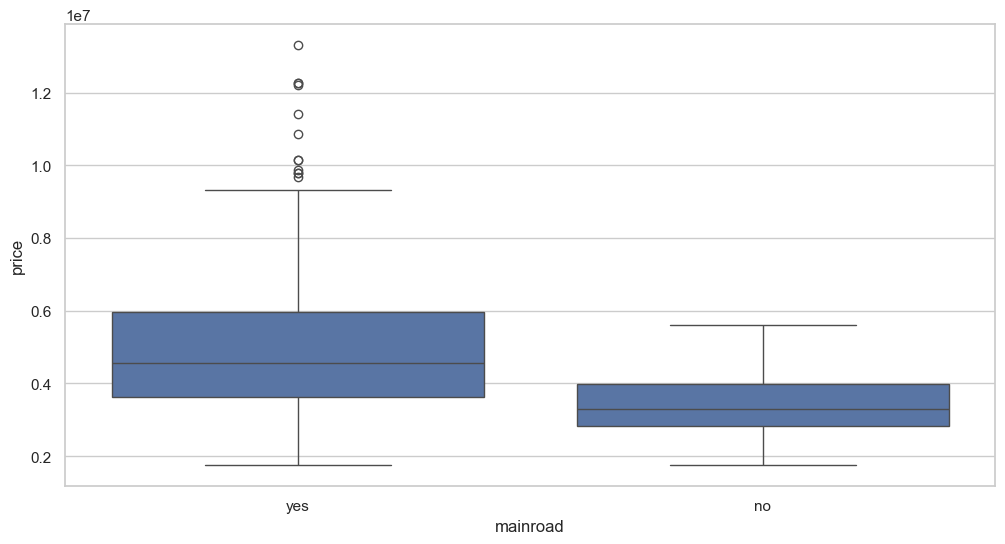

In [15]:
sns.boxplot(x='mainroad', y='price', data=df)

In [16]:
df.groupby('hotwaterheating')['price'].mean()

hotwaterheating
no     4.728593e+06
yes    5.559960e+06
Name: price, dtype: float64

<Axes: xlabel='hotwaterheating', ylabel='price'>

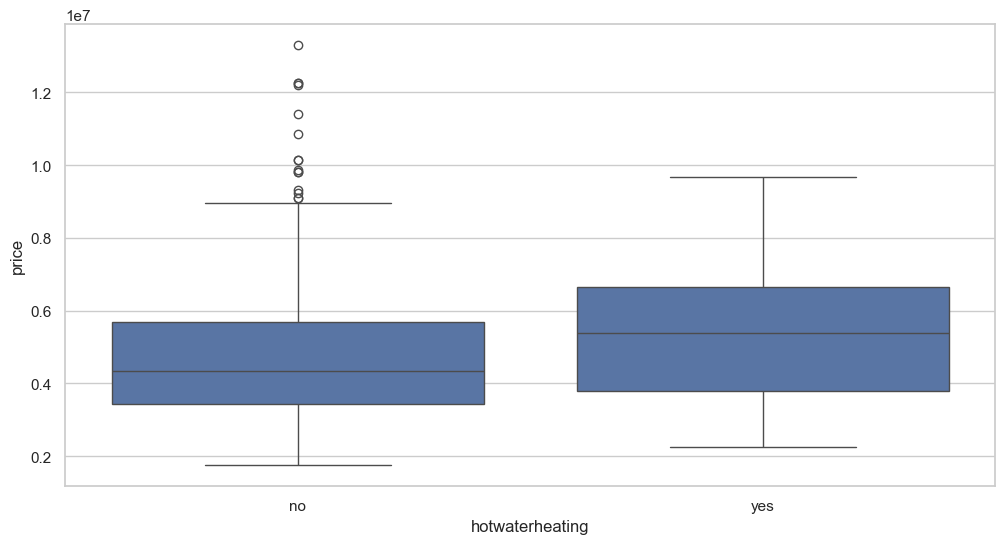

In [17]:
sns.boxplot(x='hotwaterheating', y='price', data=df)

In [18]:
df.groupby('airconditioning')['price'].mean()

airconditioning
no     4.191940e+06
yes    6.013221e+06
Name: price, dtype: float64

<Axes: xlabel='airconditioning', ylabel='price'>

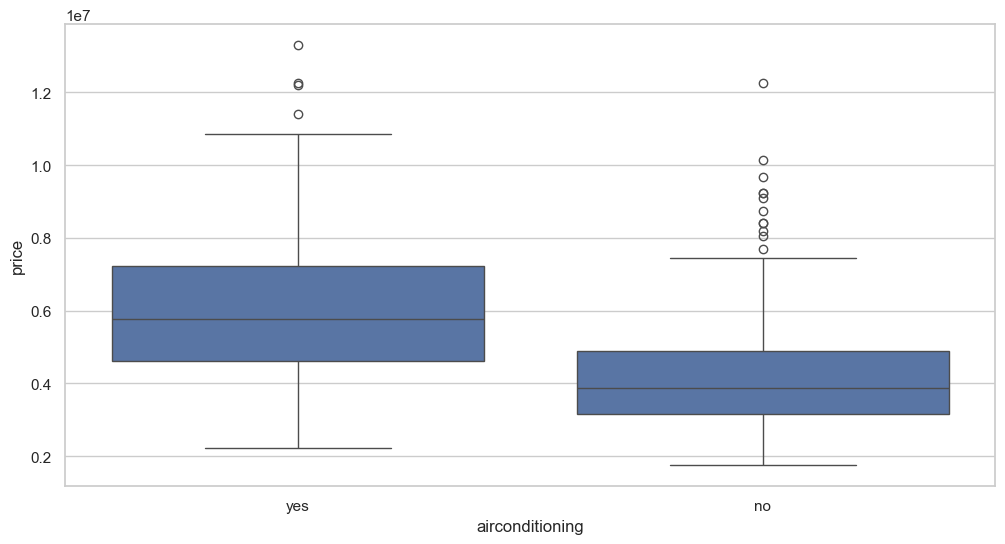

In [19]:
sns.boxplot(x='airconditioning', y='price', data=df)

In [20]:
df.mode()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,total_bhk
0,3500000,6000.0,3.0,1.0,2.0,yes,no,no,no,no,0.0,no,semi-furnished,3.0
1,4200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Inferences from Above Statiscs


### General Inference

The dataset contains information on 545 residential properties, detailing features such as area, number of bedrooms, amenities, and price. Through this EDA, we explore how various attributes influence housing prices.


#### (Mode Data) Most of the houses are:
- 3-BHK or greater
- have atleast 1-2 bathrooms
- priced moderately @ 3.50 CR
- have access to mainroad but no parking
- semi-furnished, with little to no amenities 
- majorly 2 storied, with no basement or guestrooms


### Price of Houses (in CR)

- Price Range: 1.75 - 13.3 CR

- Mean Price = 4.76 CR

- Median Price (almost 50% of the data lies here) ~ 4.34 CR

- Mode Price (most commonly) = 3.5 CR

- Standard Deviation in price is 1.87 CR

- Price is influenced by Area, Bathrooms, Number of Stories & less affected by the Number of Bedrooms and Availabiliy of Parking/Amenities

### Area of Houses (in Square Feet)

- Range: 1650 - 16200

- Mean Area = 5150

- Median Price (almost 50% of the data lies here) ~ 4600

- Mode Price (most commonly) = 6000

- Standard Deviation in price is 2170

- Most of the area is occupied Bedrooms or Bathrooms (+ve Correlation)

- Furnished houses are most expensive, with decreasing order of furnishment


#### Direct Comparison of Price & Area reveals that they have a Positive Correlation - larger houses cost more. Most number of semi-furnished & furnished houses follow the same trends, needing very less work to move in. Small-to-Medium sized houses (4000-7000 sq. ft.) are priced around 3.5 - 5.5 CR, with little to no amenities, but not in the preferred area.


### Analysis for Number of Bedrooms (including Guestroom), Bathrooms & Total BHK

- Number of Bedrooms Range from 1-6

- Number of Bathrooms Range from 1-4

- Most of the houses are 3-BHK, comprising only 3 Unfurnished Bedrooms and no Guestroom

- Most of the houses have atleast 1 Bathroom, which is atleast Semi-Furnished, with very few having 2 or 3 Bathrooms

- Only a few (just 97) houses which are 4-BHK or more have a Guestroom

- 5-BHK houses are the most expensive ones amongst all

### Analysis for Parking and Number of Stories

- Most of houses are 2 storied, with a large number also being 1 storied, but only a few being 3 or 4 storied

- There are 2-storied houses in all three categories of furnishment

- Most of the houses don't accomodate space for parking, with only a few having space for 1 or 2 cars and very few having space for 3 or more cars

- Only furnished houses accomodate for parking space for 2 vehicles, rest only have space for 1 or no parking at all

- Overall they have little to moderate effect on the price

### Analysis for Amenities

- As most of the houses are semi-furnished, they majorly lack amenities such as Hot Water Heating & Air Conditioning, majorly affecting the price as people desire comfort

- Having access to Mainroad or having a Preferred Area is associated with premium pricing


### Summary

The dataset contains 545 housing records with key variables (as factors) like area, bedrooms, locational factors and amenities which affect the overall price of the property. Most homes are semi-furnished 3-BHKs, lack guestrooms and modern amenities, and are moderately priced between 3.5–5.5 CR. Area and price show strong positive correlation, while features like number of bathrooms, preferred location, air conditioning, and main road access significantly impact pricing. Parking and number of stories have minor effects. The data highlights that larger, well-located, and amenity-rich homes command higher prices.